<a href="https://colab.research.google.com/github/shihabshahriar16/Apriori-and-FP-Growth/blob/main/Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!git clone https://github.com/shihabshahriar16/Apriori-and-FP-Growth.git

Cloning into 'Apriori-and-FP-Growth'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


# Resource Followed
https://towardsdatascience.com/apriori-association-rule-mining-explanation-and-python-implementation-290b42afdfc6

# Concepts of Apriori
* Support: Fraction of transactions that contain an itemset
* Confidence: Measures how often items in Y appear in transactions that contain
* Frequent itemset: An itemset whose support is greater than or equal to a minSup threshold

# Main idea of Apriori
All non-empty subsets of a frequent itemset must also be frequent.

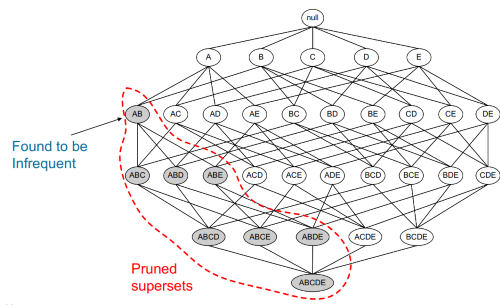

# Algorithm Overview



```
L[1] = {frequent 1-itemsets};
for (k=2; L[k-1] != 0; k ++) do begin
    // perform self-joining
    C[k] = getUnion(L[k-1])
    // remove pruned supersets
    C[k] = pruning(C[k])
    // get itemsets that satisfy minSup
    L[k] = getAboveMinSup(C[k], minSup)
end
Answer = Lk (union)
```



# Import necessary libraries

In [ ]:
from collections import defaultdict
from itertools import chain, combinations

#Candidate Generation
For self-joining, we simply get all the union through brute-force and only return those are in the specific length.

In [1]:
def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

# Pruning
To perform subset testing, we loop through all possible subsets in the itemset. If the subset is not in the previous frequent itemset, we prune it.

In [2]:
def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

# Get Frequent Itemset from Candidate

In [3]:
def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

In [4]:
def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

# Apriori Function

In [6]:
def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))

In [7]:
def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules

In [8]:
def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result, global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2])

    return globalFreqItemSet, rules

#Read an already preprocessed dataset

In [10]:
import csv
def getFromFile(fname):
    itemSets = []
    itemSet = set()

    with open(fname, 'r') as file:
        csv_reader = csv.reader(file)
        for line in csv_reader:
            line = list(filter(None, line))
            record = set(line)
            for item in record:
                itemSet.add(frozenset([item]))
            itemSets.append(record)
    return itemSet, itemSets

In [55]:
itemset,itemsets = getFromFile('/content/Apriori-and-FP-Growth/Confectionary store transaction dataset.csv')

In [56]:
# Select some number of random transactions
# import random
# itemsets = random.sample(itemsets, 6263)
# len(itemsets)

6263

# Run Algorithm

In [47]:
import time
start_time = time.time()
globalfrq,rules = apriori(itemsets,0.02,0.5)
end_time = time.time()
print(end_time-start_time)

3.12050724029541


In [ ]:
print(globalfrq)

In [ ]:
print(rules)

# Read a dataset that is not yet processed

In [57]:
import pandas
csvFile = pandas.read_csv('/content/Apriori-and-FP-Growth/All-purpose gift store dataset.csv',encoding= 'unicode_escape')
transactions = csvFile.groupby('InvoiceNo')["Description"].apply(list)
csvFile.head()
itemset = set()
itemsets = []
for r in transactions:
  itemsets.append(set(r))
  itemset = itemset.union(set(r))

In [42]:
# Select some number of random transactions
# import random
# itemsets = random.sample(itemsets, 6263)
# len(itemsets)

12950

# Run Algorithm

In [52]:
import time
start_time = time.time()
globalfrq,rules = apriori(itemsets,0.02,0.5)
end_time = time.time()
print(end_time-start_time)

22.463289260864258


In [ ]:
print(globalfrq)

In [ ]:
print(rules)

# Shortcomings
There are two major shortcomings of Apriori Algorithms

*   The size of itemset from candidate generation could be extremely large
*   Lots of time wasted on counting the support since we have to scan the itemset database over and over again




# Improvements
There are many extra techniques that can be applied to Apriori to improve efficiency. Some of them are listed below.
* Hashing: reduce database scans
* Transaction reduction: remove infrequent transactions from further consideration
* Partitioning: possibly frequent must be frequent in one of the partition
* Dynamic Itemset Counting: reduce the number of passes over the data
* Sampling: pick up random samples